In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import missingno as mn
from scipy.stats import skew
from scipy.stats import kurtosis
import statsmodels.api as sm
import pylab as py
import import_ipynb

In [2]:
import Template as t

importing Jupyter notebook from Template.ipynb


In [3]:
df=t.load_data('csv')

Enter path of filetelecom_users.csv


In [4]:
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [5]:
t.overview(df,'head',7)

The shape is : (5986, 22)
The column data types are: 

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


The first 7 rows are :


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No


In [6]:
t.change_descr(df,'TotalCharges',value=" ",new_value=np.nan)

Remove white space? Y or NN
change column name? Y or NN


In [7]:
t.change_type(df,'TotalCharges','float')

In [8]:
t.remove_cols(df,'Unnamed: 0','customerID')

In [9]:
t.missing_details(df)

,"Missing value, %",Missing value count,N unique value
gender,0.0,0,2
SeniorCitizen,0.0,0,2
Partner,0.0,0,2
Dependents,0.0,0,2
tenure,0.0,0,73
PhoneService,0.0,0,2
MultipleLines,0.0,0,3
InternetService,0.0,0,3
OnlineSecurity,0.0,0,3
OnlineBackup,0.0,0,3


In [10]:
t.handle_mv(df,'TotalCharges','median')

In [11]:
t.change_type(df,'TotalCharges','float')

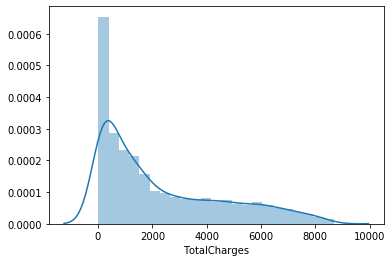

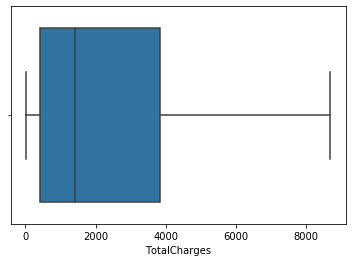

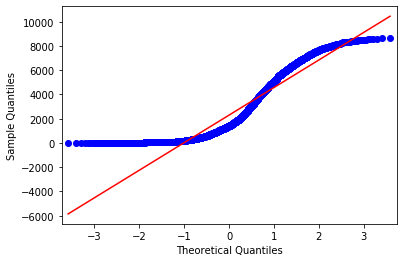

count    5986.000000
mean     2296.575195
std      2272.514648
min        18.799999
25%       406.274994
50%      1412.150024
75%      3841.500061
max      8684.799805
Name: TotalCharges, dtype: float64

Skew is 0.9516130089759827
Kurtosis is -0.25944185653043306
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.861,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=292.340
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=13458474.000,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.158,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=1.000,p=0.000

Not normally distributed accordin

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [12]:
t.numerical_analysis(df,'TotalCharges')

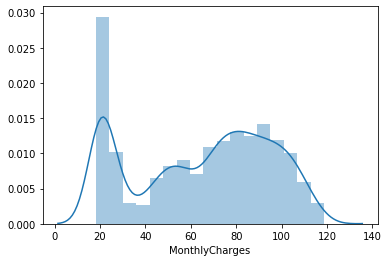

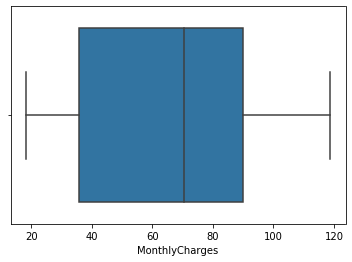

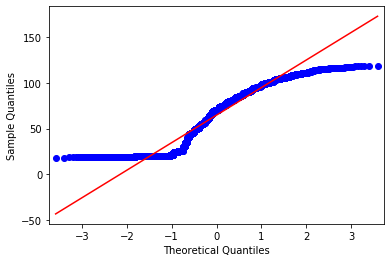

count    5986.000000
mean       64.802213
std        30.114702
min        18.250000
25%        35.650000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

Skew is -0.21862368693019338
Kurtosis is -1.2596210933839709
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.921,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=144.466
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=83758.992,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.125,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=1.000,p=0.000

Not normally distributed according 

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
t.numerical_analysis(df,'MonthlyCharges')

Transforming numerical data as it is right skewed

In [14]:
c=['TotalCharges','MonthlyCharges']
df2=t.deep_copy(df)
for i in c:
    df2[i]=np.log(df2[i])

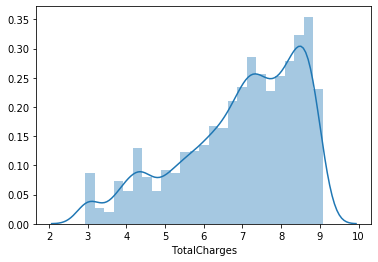

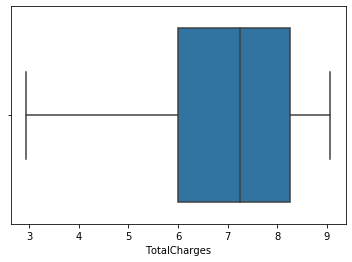

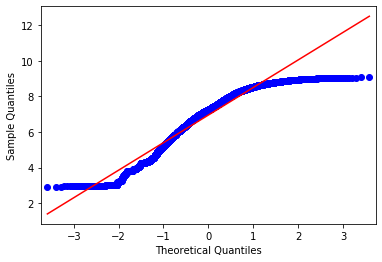

count    5986.000000
mean        6.949801
std         1.547743
min         2.933857
25%         6.007030
50%         7.252869
75%         8.253618
max         9.069329
Name: TotalCharges, dtype: float64

Skew is -0.7529685497283936
Kurtosis is -0.28853931255903875
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.929,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=119.150
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=2062.951,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.087,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.998,p=0.000

Not normally distributed according to Ko

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


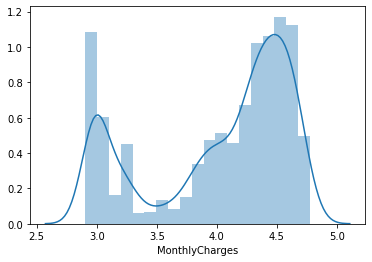

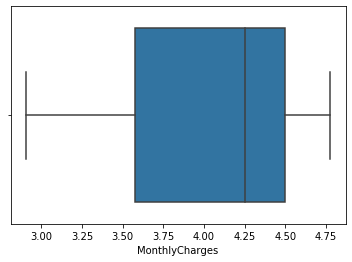

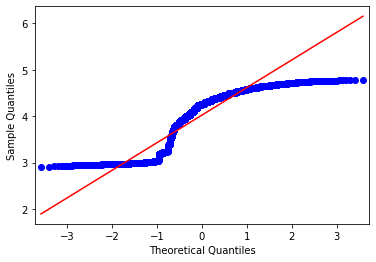

count    5986.000000
mean        4.022614
std         0.594180
min         2.904165
25%         3.573749
50%         4.254193
75%         4.498698
max         4.777020
Name: MonthlyCharges, dtype: float64

Skew is -0.7274687373627245
Kurtosis is -0.9546236621748347
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.851,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=334.425
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=525.282,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.172,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.998,p=0.000

Not normally distributed according to Kolm

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
c=['TotalCharges','MonthlyCharges']
for i in c:
    t.numerical_analysis(df2,i)

In [16]:
c=['TotalCharges','MonthlyCharges']
df3=t.deep_copy(df)
from scipy.stats import yeojohnson
for i in c:
    df3[i],liam = yeojohnson(df3[i])

E:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


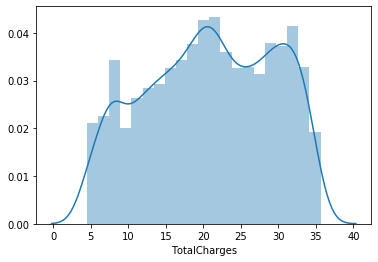

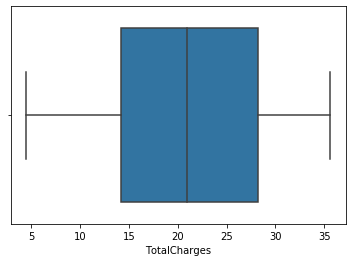

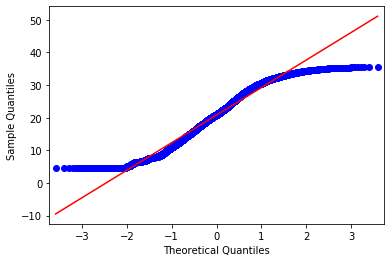

count    5986.000000
mean       20.801649
std         8.440032
min         4.472388
25%        14.213264
50%        20.974380
75%        28.198018
max        35.612751
Name: TotalCharges, dtype: float64

Skew is -0.14491301774978638
Kurtosis is -1.047581414541028
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.964,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=48.216
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=20495.305,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.060,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=1.000,p=0.000

Not normally distributed according to

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


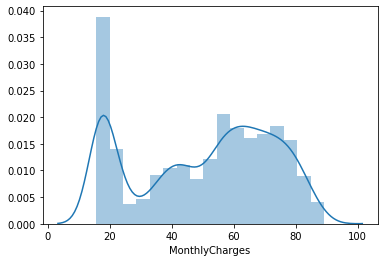

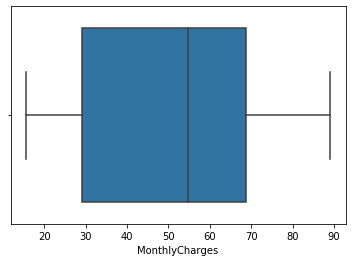

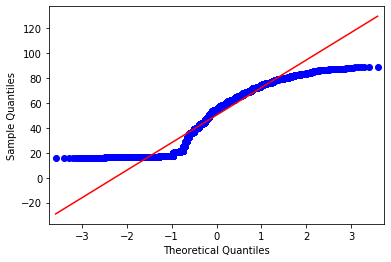

count    5986.000000
mean       50.349073
std        22.162495
min        15.568036
25%        29.110321
50%        54.842777
75%        68.827249
max        89.114072
Name: MonthlyCharges, dtype: float64

Skew is -0.2582722820638839
Kurtosis is -1.252610900028315
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.918,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=152.691
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=58386.169,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.126,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=1.000,p=0.000

Not normally distributed according to

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
c=['TotalCharges','MonthlyCharges']
for i in c:
    t.numerical_analysis(df3,i)

In [25]:
#Square root transformation
c=['TotalCharges','MonthlyCharges']
df4=t.deep_copy(df)
from scipy.stats import boxcox
for i in c:
    df4[i] = boxcox(df4[i],lmbda=0.5)


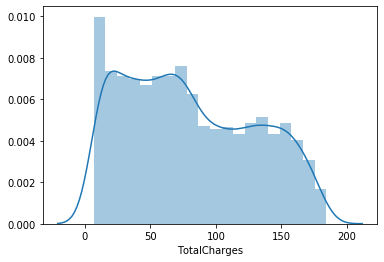

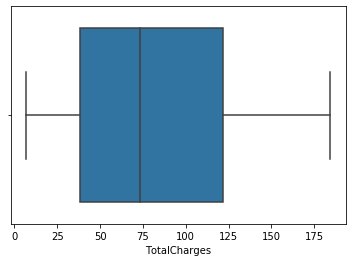

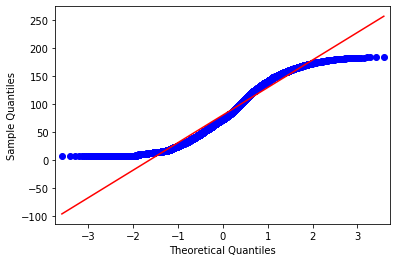

count    5986.000000
mean       80.303314
std        49.121681
min         6.671793
25%        38.312525
50%        73.157166
75%       121.959667
max       184.384552
Name: TotalCharges, dtype: float64

Skew is 0.3035430610179901
Kurtosis is -1.0711938182169516
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.949,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=81.651
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=179836.484,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.067,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=1.000,p=0.000

Not normally distributed according to

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


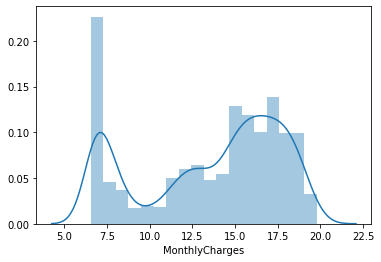

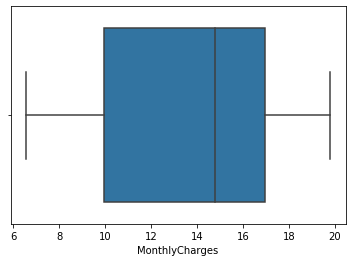

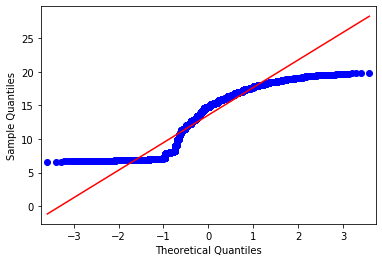

count    5986.000000
mean       13.567365
std         4.107166
min         6.544004
25%         9.941524
50%        14.780942
75%        16.963122
max        19.794495
Name: MonthlyCharges, dtype: float64

Skew is -0.48243998485329237
Kurtosis is -1.1587026913359697
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.893,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=218.502
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=7441.373,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.133,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=1.000,p=0.000

Not normally distributed according t

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [26]:
c=['TotalCharges','MonthlyCharges']
for i in c:
    t.numerical_analysis(df4,i)

Amongst the three trasnformations, yeojohnson transformation has produced better results for the column TotalCharges. Monthlycharges will kept as it is since results of transformations are not good


In [41]:
df2=t.deep_copy(df)
df2['TotalCharges'],liam=yeojohnson(df2['TotalCharges'])

E:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [42]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [43]:
c=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

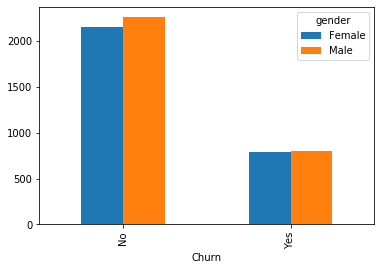

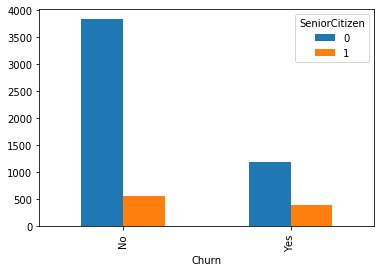

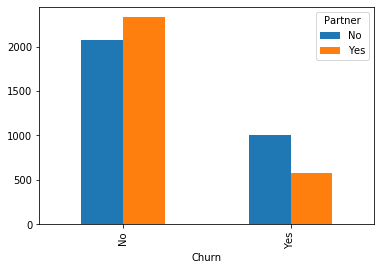

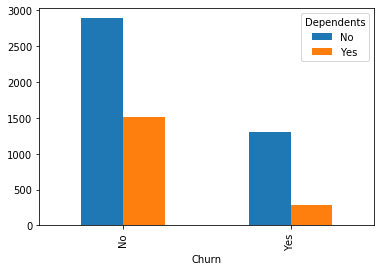

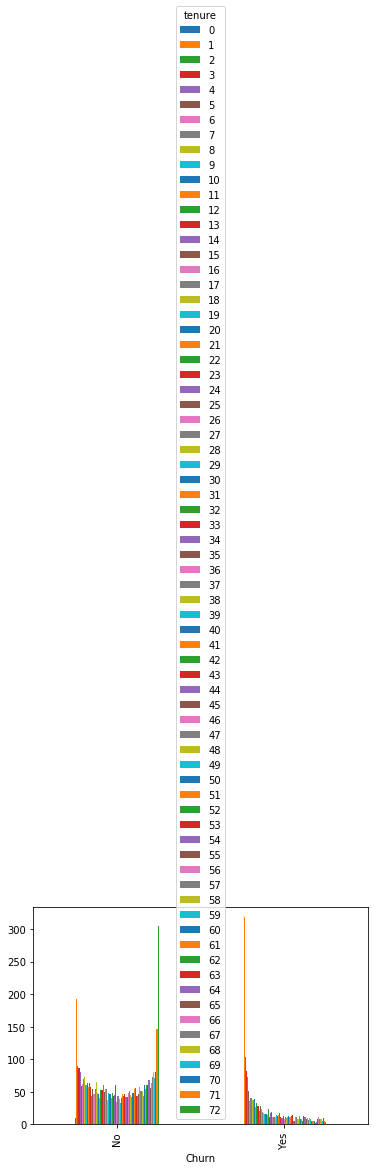

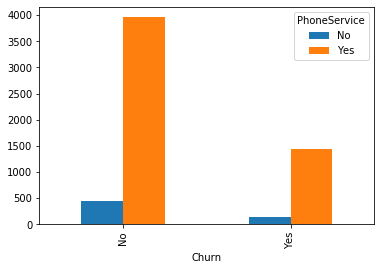

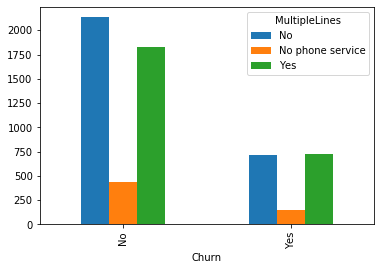

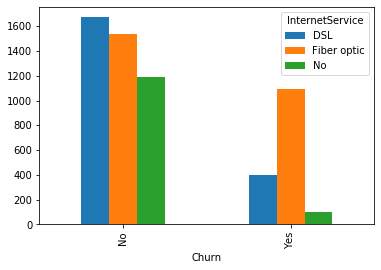

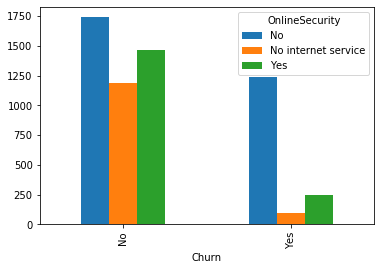

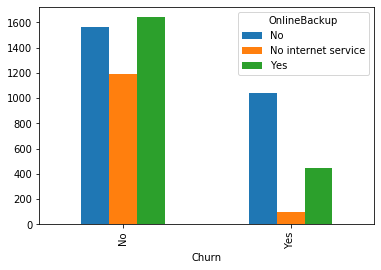

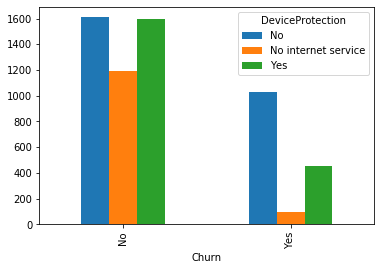

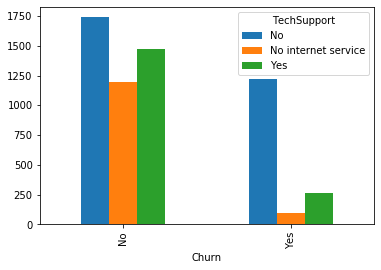

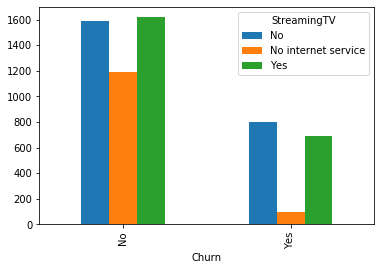

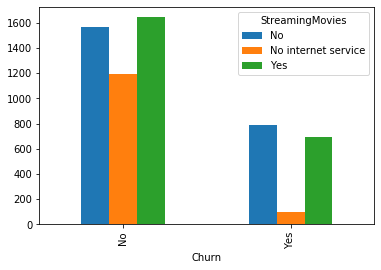

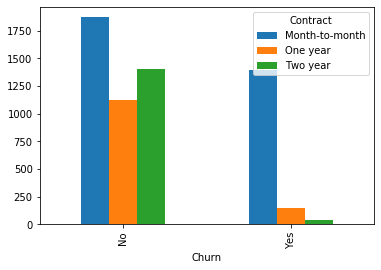

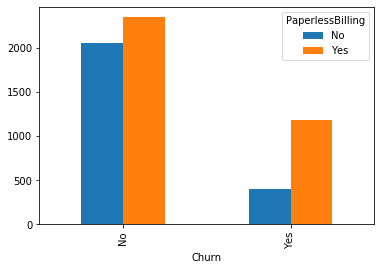

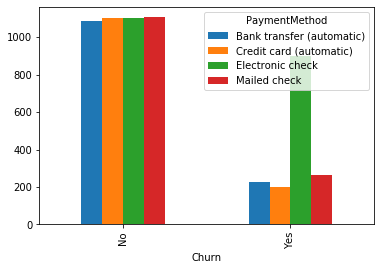

In [44]:
for i in c:
    ct=pd.crosstab(df2['Churn'],df2[i])
    ct.plot.bar()

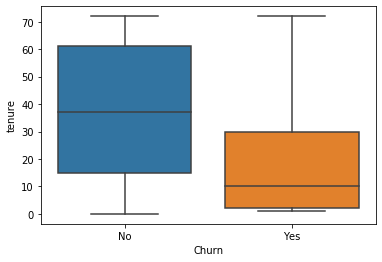

In [50]:
sns.boxplot(x="Churn", y="tenure", data=df2)

As the tenure increases chances of churn decrease

On the basis of categorical analysis following encoding has been adopted
1. Label Encode: gender,SeniorCitizen,dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies
2. Ordinal Encode:partner,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod

In [51]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
df2=t.encode(df2,'gender','SeniorCitizen','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies')

Enter encode typelabel


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [53]:
df2=t.encode(df2,'Partner','InternetService','TechSupport','Contract', 'PaperlessBilling', 'PaymentMethod')

Enter encode typeordinal
Partner
enter a number of unique values present in the column: 2
Unique value for the columnYes
Enter ordinal number for the value1
Unique value for the columnNo
Enter ordinal number for the value0
InternetService
enter a number of unique values present in the column: 3
Unique value for the columnNo
Enter ordinal number for the value0
Unique value for the columnDSL
Enter ordinal number for the value1
Unique value for the columnFiber optic
Enter ordinal number for the value2
TechSupport
enter a number of unique values present in the column: 3
Unique value for the columnNo internet service
Enter ordinal number for the value0
Unique value for the columnYes
Enter ordinal number for the value1
Unique value for the columnNo
Enter ordinal number for the value2
Contract
enter a number of unique values present in the column: 3
Unique value for the columnTwo year
Enter ordinal number for the value0
Unique value for the columnOne year
Enter ordinal number for the value1
U

In [54]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,0,1,1,1,0,1,1,0,0,0,24.10,22.312508,No
1,0,0,0,0,44,1,0,2,0,2,2,2,2,0,2,1,0,88.15,28.474878,No
2,0,1,1,0,38,1,2,2,0,0,0,2,0,0,2,1,1,74.95,25.899738,Yes
3,1,0,0,0,4,1,0,1,0,0,0,2,0,2,2,1,3,55.90,11.919341,No
4,1,0,0,0,2,1,0,1,2,0,2,2,0,0,2,0,3,53.45,9.376506,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,2,2,0,0,2,2,2,2,1,3,95.00,8.628366,Yes
5982,0,0,1,1,23,1,2,1,2,2,2,1,2,2,0,1,0,91.10,23.943058,No
5983,1,0,1,1,12,1,0,0,1,1,1,0,1,1,2,1,3,21.15,12.954273,No
5984,1,1,0,0,12,1,2,2,0,0,2,2,2,2,2,1,3,99.45,19.964777,Yes


In [57]:
t.change_descr(df2,'Churn',value='No',new_value=0)

Remove white space? Y or NN
change column name? Y or NN


In [58]:
t.change_descr(df2,'Churn',value='Yes',new_value=1)

Remove white space? Y or NN
change column name? Y or NN


In [59]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,0,1,1,1,0,1,1,0,0,0,24.10,22.312508,0
1,0,0,0,0,44,1,0,2,0,2,2,2,2,0,2,1,0,88.15,28.474878,0
2,0,1,1,0,38,1,2,2,0,0,0,2,0,0,2,1,1,74.95,25.899738,1
3,1,0,0,0,4,1,0,1,0,0,0,2,0,2,2,1,3,55.90,11.919341,0
4,1,0,0,0,2,1,0,1,2,0,2,2,0,0,2,0,3,53.45,9.376506,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,2,2,0,0,2,2,2,2,1,3,95.00,8.628366,1
5982,0,0,1,1,23,1,2,1,2,2,2,1,2,2,0,1,0,91.10,23.943058,0
5983,1,0,1,1,12,1,0,0,1,1,1,0,1,1,2,1,3,21.15,12.954273,0
5984,1,1,0,0,12,1,2,2,0,0,2,2,2,2,2,1,3,99.45,19.964777,1


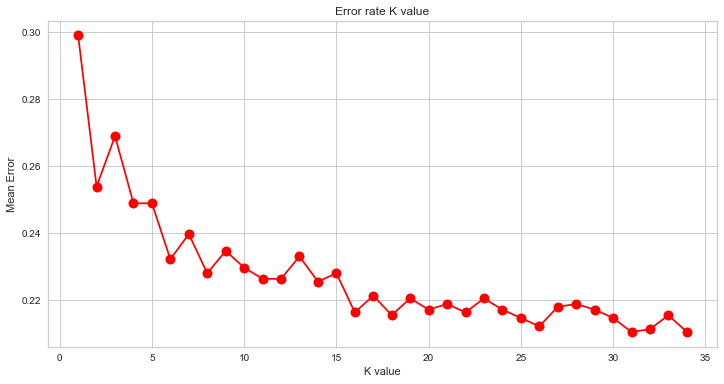

In [64]:
t.knn_plot(df2,'Churn',classification=True,over_sample=False)

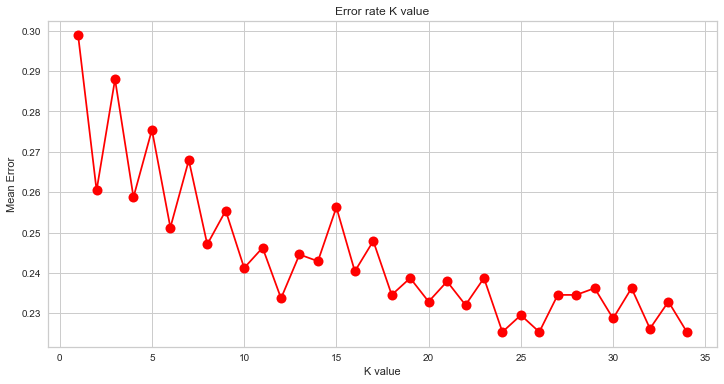

In [81]:
t.knn_plot(df2,'Churn',classification=True,over_sample=True)

Running on default parameters 

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Accuracy  (%): 
 75.12520868113522
AUC  (%): 
 66.76106716816933
Precision: 
 50.841750841750844
Recall (%): 
 49.834983498349835
f1 score (%): 
 50.33333333333334
logistic loss :
 8.591545999088641
KNN
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       895
           1       0.51      0.50      0.50       303

    accuracy                           0.75      1198
   macro avg       0.67      0.67      0.67      1198
weighted avg       0.75      0.75      0.75      1198



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


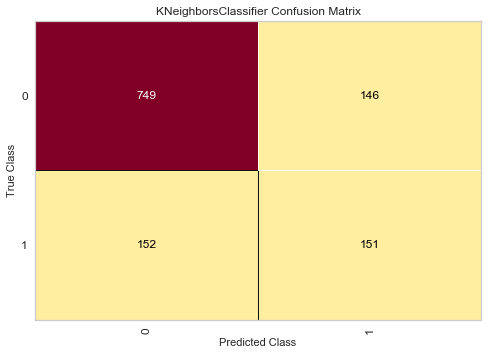

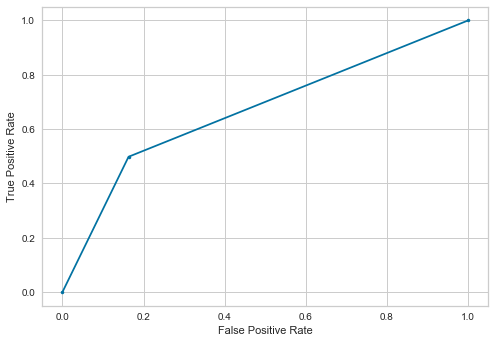

In [61]:
t.fit_model(df2,'Churn','KNN',classification=True)

Changing number of neighbors

Accuracy  (%): 
 76.54424040066779
AUC  (%): 
 68.58399247746003
Precision: 
 53.71621621621622
Recall (%): 
 52.475247524752476
f1 score (%): 
 53.08848080133556
logistic loss :
 8.101423799514055
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       895
           1       0.54      0.52      0.53       303

    accuracy                           0.77      1198
   macro avg       0.69      0.69      0.69      1198
weighted avg       0.76      0.77      0.76      1198



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


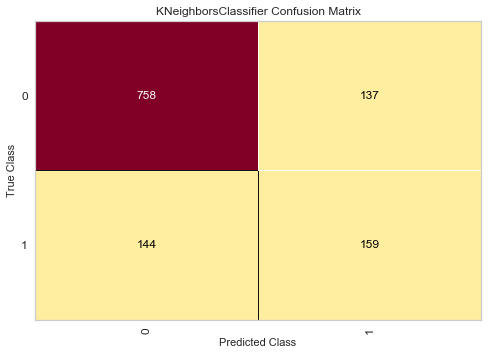

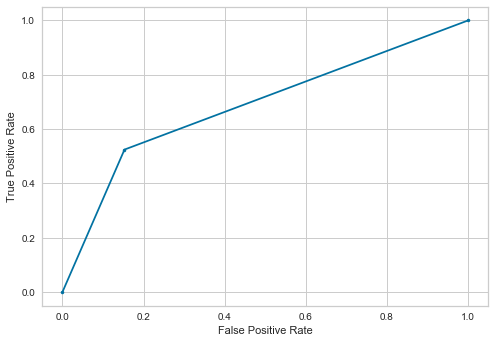

In [67]:
t.knn_with_n(df2,'Churn',n=9,classification=True)

Accuracy  (%): 
 77.37896494156928
AUC  (%): 
 69.36095285506202
Precision: 
 55.51724137931034
Recall (%): 
 53.135313531353134
f1 score (%): 
 54.300168634064086
logistic loss :
 7.813114817269859
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       895
           1       0.56      0.53      0.54       303

    accuracy                           0.77      1198
   macro avg       0.70      0.69      0.70      1198
weighted avg       0.77      0.77      0.77      1198



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


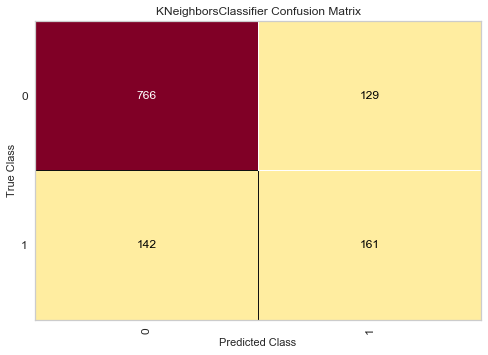

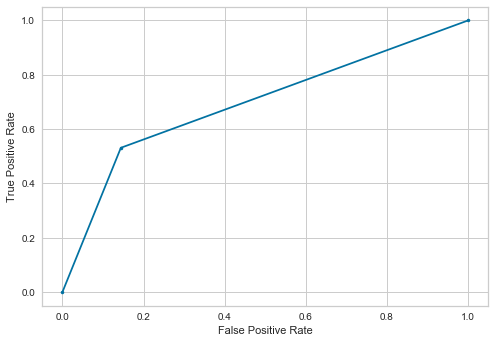

In [74]:
t.knn_with_n(df2,'Churn',n=11,classification=True)

Accuracy  (%): 
 77.21202003338898
AUC  (%): 
 69.57667275107399
Precision: 
 55.033557046979865
Recall (%): 
 54.12541254125413
f1 score (%): 
 54.575707154742105
logistic loss :
 7.870778883026931
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       895
           1       0.55      0.54      0.55       303

    accuracy                           0.77      1198
   macro avg       0.70      0.70      0.70      1198
weighted avg       0.77      0.77      0.77      1198



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


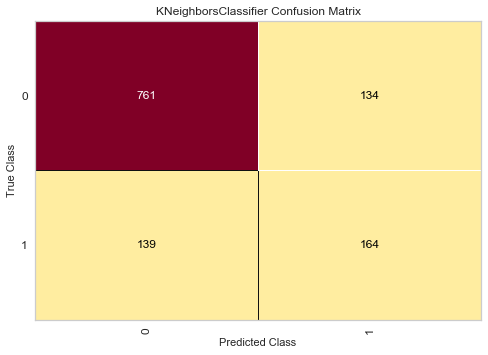

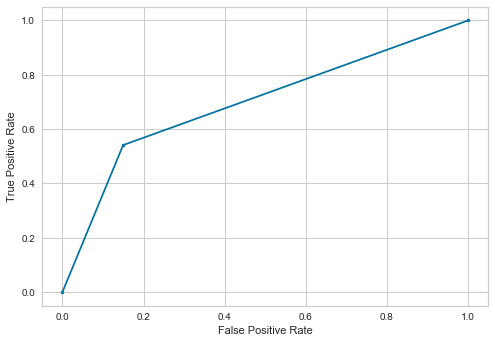

In [77]:
t.knn_with_n(df2,'Churn',n=15,classification=True)

#### Oversampling

Accuracy  (%): 
 73.20534223706177
AUC  (%): 
 68.64151778306322
Precision: 
 47.61904761904761
Recall (%): 
 59.4059405940594
f1 score (%): 
 52.863436123348016
logistic loss :
 9.254679084355182
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       895
           1       0.48      0.59      0.53       303

    accuracy                           0.73      1198
   macro avg       0.66      0.69      0.67      1198
weighted avg       0.76      0.73      0.74      1198



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


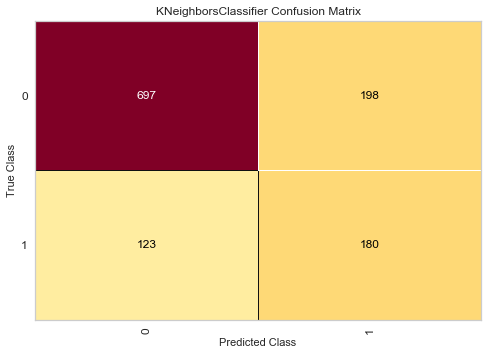

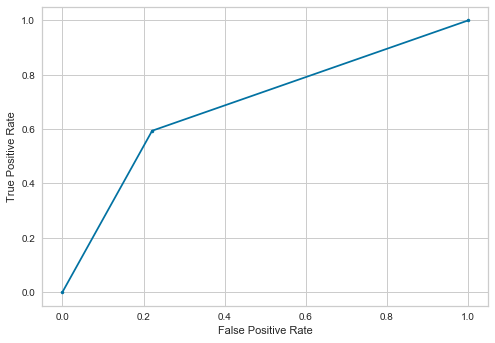

In [83]:
t.knn_with_n(df2,'Churn',n=9,classification=True,over_sample=True,sampling_strategy=0.5)

Accuracy  (%): 
 66.19365609348915
AUC  (%): 
 70.06121282519314
Precision: 
 41.11498257839721
Recall (%): 
 77.88778877887789
f1 score (%): 
 53.81984036488028
logistic loss :
 11.676523125100362
              precision    recall  f1-score   support

           0       0.89      0.62      0.73       895
           1       0.41      0.78      0.54       303

    accuracy                           0.66      1198
   macro avg       0.65      0.70      0.64      1198
weighted avg       0.77      0.66      0.68      1198



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


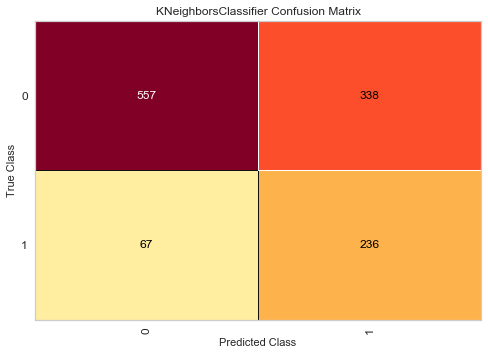

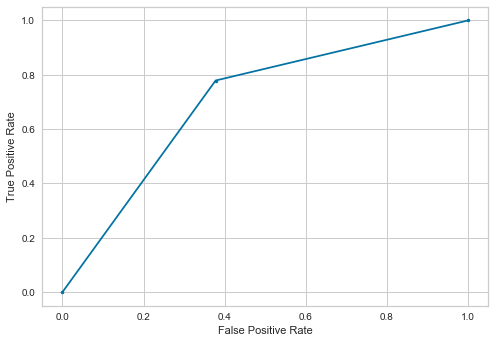

In [86]:
t.knn_with_n(df2,'Churn',n=17,classification=True,over_sample=True,sampling_strategy='minority')

The best f1-score achieved by using knn is 0.55 for the minority class 